# Example of loading and running the Euro-Calliope model

Optional scenarios:
- freeze-hydro-capacities: set hydro capacities to today's values
- dispatch: run the problem as a rolling horizon optimisation, where the system does not know about weather conditions or demand more than 1 week ahead of time
- load-shedding: Include an expensive 'technology' to enable load shedding when supply is insufficient to meet demand.

`dispatch` and `load-shedding` are for use when capacities have been fixed based on an optimal run (see `Setting capacities to be fixed and re-running` later in this notebook).

In [1]:
import os

import enum
import calliope

calliope.set_log_verbosity("warning")

#inputdir = "/home/users/train028/euro-calliope-uk_irl/"
inputdir="/gws/pw/j05/cop26_hackathons/oxford/Group_folders/group_2/2.3_shared/euro-calliope-uk_irl_2/"
outputdir = "~/outputs"
calliope.set_log_verbosity("warning")

if "GRB_LICENSE_FILE" not in os.environ.keys():
    os.environ["GRB_LICENSE_FILE"] = "/gws/smf/j04/cop26_hackathons/oxford/gurobi/gurobi.lic"

In [2]:
# Model for 1_in100yr
model = calliope.Model(
    os.path.join(inputdir, "national_AWD", "example-model.yaml"), 
    scenario="freeze-hydro-capacities"
)

In [3]:
model.run()

[2021-06-25 06:47:58] INFO     Loading sets
[2021-06-25 06:47:58] INFO     Loading parameters
[2021-06-25 06:47:58] INFO     constraints are loaded in the following order: ['capacity', 'costs', 'dispatch', 'energy_balance', 'network', 'policy', 'conversion', 'conversion_plus', 'group', 'export', 'milp']
[2021-06-25 06:47:58] INFO     creating capacity constraints
[2021-06-25 06:47:58] INFO     creating costs constraints
[2021-06-25 06:47:59] INFO     creating dispatch constraints
[2021-06-25 06:48:00] INFO     creating energy_balance constraints
[2021-06-25 06:48:01] INFO     creating network constraints
[2021-06-25 06:48:01] INFO     creating policy constraints
[2021-06-25 06:48:01] INFO     creating conversion constraints
[2021-06-25 06:48:01] INFO     creating conversion_plus constraints
[2021-06-25 06:48:01] INFO     creating group constraints
[2021-06-25 06:48:01] INFO     creating export constraints
[2021-06-25 06:48:01] INFO     creating milp constraints
[2021-06-25 06:48:02] DE

In [4]:
# check the model results
model.results

<xarray.Dataset>
Dimensions:                                 (carriers: 1, costs: 1, loc_carriers_system_balance_constraint: 2, loc_tech_carriers_con: 10, loc_tech_carriers_prod: 24, loc_techs: 26, loc_techs_area: 4, loc_techs_balance_demand_constraint: 2, loc_techs_cost: 24, loc_techs_cost_investment_constraint: 24, loc_techs_investment_cost: 24, loc_techs_om_cost: 24, loc_techs_store: 10, loc_techs_supply_plus: 4, techs: 17, timesteps: 365)
Coordinates: (12/16)
  * loc_tech_carriers_con                   (loc_tech_carriers_con) object 'G...
  * loc_tech_carriers_prod                  (loc_tech_carriers_prod) object '...
  * loc_techs_cost                          (loc_techs_cost) object 'GBR::ac_...
  * loc_techs_cost_investment_constraint    (loc_techs_cost_investment_constraint) object ...
  * loc_techs_investment_cost               (loc_techs_investment_cost) object ...
  * loc_techs_om_cost                       (loc_techs_om_cost) object 'GBR::...
    ...                                      ...
  * loc_carriers_system_balance_constraint  (loc_carriers_system_balance_constraint) object ...
  * loc_techs                               (loc_techs) object 'GBR::hydrogen...
  * loc_techs_area                          (loc_techs_area) object 'IRL::ope...
  * loc_techs_balance_demand_constraint     (loc_techs_balance_demand_constraint) object ...
  * timesteps                               (timesteps) datetime64[ns] 2016-0...
  * carriers                                (carriers) <U11 'electricity'
Data variables: (12/19)
    energy_cap                              (loc_techs) float64 0.0 ... 0.0
    carrier_prod                            (loc_tech_carriers_prod, timesteps) float64 ...
    carrier_con                             (loc_tech_carriers_con, timesteps) float64 ...
    cost                                    (costs, loc_techs_cost) float64 2...
    resource_area                           (loc_techs_area) float64 0.0 ... 0.0
    storage_cap                             (loc_techs_store) float64 0.0 ......
    ...                                      ...
    system_balance                          (loc_carriers_system_balance_constraint, timesteps) float64 ...
    required_resource                       (loc_techs_balance_demand_constraint, timesteps) float64 ...
    capacity_factor                         (timesteps, loc_tech_carriers_prod) float64 ...
    systemwide_capacity_factor              (carriers, techs) float64 nan ......
    systemwide_levelised_cost               (carriers, costs, techs) float64 ...
    total_levelised_cost                    (carriers, costs) float64 0.08785
Attributes:
    termination_condition:     optimal
    objective_function_value:  1.3709112444898677
    solution_time:             18.281375
    time_finished:             2021-06-25 06:48:16
    calliope_version:          0.6.7-dev
    applied_overrides:         freeze-hydro-capacities
    scenario:                  freeze-hydro-capacities
    defaults:                  available_area: null\ncarrier_ratios: false\nc...
    allow_operate_mode:        1
    model_config:              calliope_version: 0.6.7\nname: Example model\n...
    run_config:                backend: pyomo\nbigM: 1000000000.0\ncyclic_sto...

In [5]:
# Model for 1_in50yr
model2 = calliope.Model(
    os.path.join(inputdir, "national_AWD", "example-model2.yaml"), 
    scenario="freeze-hydro-capacities"
)
# Model for 1_in20yr
model3 = calliope.Model(
    os.path.join(inputdir, "national_AWD", "example-model3.yaml"), 
    scenario="freeze-hydro-capacities"
)
# Model for mostextreme
model4 = calliope.Model(
    os.path.join(inputdir, "national_AWD", "example-model4.yaml"), 
    scenario="freeze-hydro-capacities"
)

In [7]:
# run model 2, 3, 4
model2.run()

[2021-06-25 06:52:21] INFO     Loading sets
[2021-06-25 06:52:21] INFO     Loading parameters
[2021-06-25 06:52:21] INFO     constraints are loaded in the following order: ['capacity', 'costs', 'dispatch', 'energy_balance', 'network', 'policy', 'conversion', 'conversion_plus', 'group', 'export', 'milp']
[2021-06-25 06:52:21] INFO     creating capacity constraints
[2021-06-25 06:52:21] INFO     creating costs constraints
[2021-06-25 06:52:22] INFO     creating dispatch constraints
[2021-06-25 06:52:22] INFO     creating energy_balance constraints
[2021-06-25 06:52:23] INFO     creating network constraints
[2021-06-25 06:52:23] INFO     creating policy constraints
[2021-06-25 06:52:23] INFO     creating conversion constraints
[2021-06-25 06:52:23] INFO     creating conversion_plus constraints
[2021-06-25 06:52:23] INFO     creating group constraints
[2021-06-25 06:52:23] INFO     creating export constraints
[2021-06-25 06:52:23] INFO     creating milp constraints
[2021-06-25 06:52:28] DE

In [8]:
model3.run()

[2021-06-25 06:52:36] INFO     Loading sets
[2021-06-25 06:52:36] INFO     Loading parameters
[2021-06-25 06:52:37] INFO     constraints are loaded in the following order: ['capacity', 'costs', 'dispatch', 'energy_balance', 'network', 'policy', 'conversion', 'conversion_plus', 'group', 'export', 'milp']
[2021-06-25 06:52:37] INFO     creating capacity constraints
[2021-06-25 06:52:37] INFO     creating costs constraints
[2021-06-25 06:52:37] INFO     creating dispatch constraints
[2021-06-25 06:52:38] INFO     creating energy_balance constraints
[2021-06-25 06:52:39] INFO     creating network constraints
[2021-06-25 06:52:39] INFO     creating policy constraints
[2021-06-25 06:52:39] INFO     creating conversion constraints
[2021-06-25 06:52:39] INFO     creating conversion_plus constraints
[2021-06-25 06:52:39] INFO     creating group constraints
[2021-06-25 06:52:39] INFO     creating export constraints
[2021-06-25 06:52:39] INFO     creating milp constraints
[2021-06-25 06:52:43] DE

In [9]:
model4.run()

[2021-06-25 06:57:41] INFO     Loading sets
[2021-06-25 06:57:41] INFO     Loading parameters
[2021-06-25 06:57:41] INFO     constraints are loaded in the following order: ['capacity', 'costs', 'dispatch', 'energy_balance', 'network', 'policy', 'conversion', 'conversion_plus', 'group', 'export', 'milp']
[2021-06-25 06:57:41] INFO     creating capacity constraints
[2021-06-25 06:57:41] INFO     creating costs constraints
[2021-06-25 06:57:42] INFO     creating dispatch constraints
[2021-06-25 06:57:43] INFO     creating energy_balance constraints
[2021-06-25 06:57:45] INFO     creating network constraints
[2021-06-25 06:57:45] INFO     creating policy constraints
[2021-06-25 06:57:45] INFO     creating conversion constraints
[2021-06-25 06:57:45] INFO     creating conversion_plus constraints
[2021-06-25 06:57:45] INFO     creating group constraints
[2021-06-25 06:57:45] INFO     creating export constraints
[2021-06-25 06:57:45] INFO     creating milp constraints
[2021-06-25 06:57:49] DE

In [69]:
UK_energy_capacities = model.get_formatted_array("energy_cap").to_series().dropna().loc["GBR"]
UK_energy_capacities

techs
ac_transmission:IRL       0.000019
battery                   0.000000
biofuel                   0.001397
demand_elec               0.001908
hydro_reservoir           0.005240
hydro_run_of_river        0.008485
hydrogen                  0.000000
open_field_pv             0.000000
pumped_hydro              0.029050
roof_mounted_pv           0.000000
wind_offshore             0.000000
wind_onshore_competing    0.000000
wind_onshore_monopoly     0.000000
Name: energy_cap, dtype: float64

## Setting capacities to be fixed and re-running

In [6]:
def update_model_capacities(optimal_model, new_model, fillna=False):
    if fillna is True:
        new_model._model_data["energy_cap_equals"] = (
            new_model._model_data["energy_cap_equals"].fillna(
                optimal_model._model_data["energy_cap"]
                .where(optimal_model._model_data.loc_techs.str.find("demand") == -1)
            )
        )
        new_model._model_data["storage_cap_equals"] = (
            new_model._model_data["storage_cap_equals"].fillna(
                optimal_model._model_data["storage_cap"]
            )
        )
    else:
        new_model._model_data["energy_cap_equals"] = (
            optimal_model._model_data["energy_cap"]
            .where(optimal_model._model_data.loc_techs.str.find("demand") == -1)
        )
        new_model._model_data["storage_cap_equals"] = optimal_model._model_data["storage_cap"]

    new_model._model_data["energy_cap_equals"].attrs["is_result"] = 0
    new_model._model_data["storage_cap_equals"].attrs["is_result"] = 0

UPDATE TIMESERIES DATA HERE
e.g. 
```
new_model = calliope.Model(
    os.path.join(inputdir, "national", "example-model.yaml"), 
    scenario="freeze-hydro-capacities,my-new-timesereries"
)
update_model(model, new_model)
new_model.run()
```

In [15]:
#model 1 1_in100
new_model = calliope.Model(
    os.path.join(inputdir, "national_AWD", "example-model.yaml"), 
    scenario="freeze-hydro-capacities,dispatch,load-shedding"
)
update_model_capacities(model, new_model, fillna=True)

# model 2 # 1_in50
new_model2 = calliope.Model(
    os.path.join(inputdir, "national_AWD", "example-model2.yaml"), 
    scenario="freeze-hydro-capacities,dispatch,load-shedding"
)
update_model_capacities(model, new_model, fillna=True)

# model 2 # 1_in20
new_model3 = calliope.Model(
    os.path.join(inputdir, "national_AWD", "example-model3.yaml"), 
    scenario="freeze-hydro-capacities,dispatch,load-shedding"
)
update_model_capacities(model, new_model, fillna=True)

# model 2 # mostextremes
new_model4 = calliope.Model(
    os.path.join(inputdir, "national_AWD", "example-model4.yaml"), 
    scenario="freeze-hydro-capacities,dispatch,load-shedding"
)
# Update
update_model_capacities(model, new_model, fillna=True)
update_model_capacities(model2, new_model2, fillna=True)
update_model_capacities(model3, new_model3, fillna=True)
update_model_capacities(model4, new_model4, fillna=True)

In [43]:
calliope.set_log_verbosity("info")
new_model.run()

[2021-06-24 10:48:06] INFO     Backend: starting model run in operational mode
[2021-06-24 10:48:07] WARNING  /home/users/train028/.conda/envs/euro-calliope/lib/python3.7/site-packages/calliope/exceptions.py:60: ModelWarning:

Possible issues found during model processing:
 * Initial stored energy not defined, set to zero for all loc::techs in loc_techs_store, for use in iterative optimisation
 * Resource capacity constraint defined and set to infinity for all supply_plus techs


[2021-06-24 10:48:07] INFO     Backend: generating initial model
[2021-06-24 10:48:07] INFO     Loading sets
[2021-06-24 10:48:07] INFO     Loading parameters
[2021-06-24 10:48:07] INFO     constraints are loaded in the following order: ['capacity', 'costs', 'dispatch', 'energy_balance', 'network', 'policy', 'conversion', 'conversion_plus', 'group', 'export', 'milp']
[2021-06-24 10:48:07] INFO     creating capacity constraints
[2021-06-24 10:48:07] INFO     creating costs constraints
[2021-06-24 10:48:07] INFO

<AxesSubplot:xlabel='timesteps'>

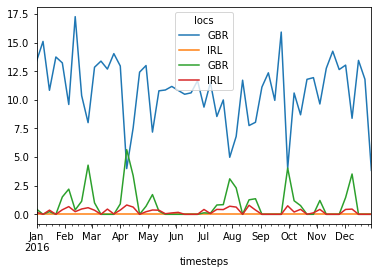

In [44]:
# look time series
energy_production = new_model.get_formatted_array("carrier_prod").to_series().dropna()
wind = (
    energy_production[energy_production.index.get_level_values("techs").str.find("wind") > -1]
    .sum(level=["locs", "timesteps"])
    .unstack("locs")
)
wind_7D_sum = wind.resample("7D").sum()
ax = wind_7D_sum.plot()

energy_production.xs("load_shedding", level="techs").droplevel("carriers").unstack("locs").resample("7D").sum().plot(ax=ax)

In [22]:
 # Results are in an xarray dataset `model.results`
model.results

<xarray.Dataset>
Dimensions:                                 (carriers: 1, costs: 1, loc_carriers_system_balance_constraint: 2, loc_tech_carriers_con: 10, loc_tech_carriers_prod: 24, loc_techs: 26, loc_techs_area: 4, loc_techs_balance_demand_constraint: 2, loc_techs_cost: 24, loc_techs_cost_investment_constraint: 24, loc_techs_investment_cost: 24, loc_techs_om_cost: 24, loc_techs_store: 10, loc_techs_supply_plus: 4, techs: 17, timesteps: 366)
Coordinates: (12/16)
  * loc_carriers_system_balance_constraint  (loc_carriers_system_balance_constraint) object ...
  * loc_tech_carriers_con                   (loc_tech_carriers_con) object 'G...
  * loc_tech_carriers_prod                  (loc_tech_carriers_prod) object '...
  * loc_techs_balance_demand_constraint     (loc_techs_balance_demand_constraint) object ...
  * loc_techs_cost                          (loc_techs_cost) object 'GBR::ac_...
  * loc_techs_cost_investment_constraint    (loc_techs_cost_investment_constraint) object ...
    ...                                      ...
  * techs                                   (techs) object 'ac_transmission' ...
  * costs                                   (costs) object 'monetary'
  * loc_techs                               (loc_techs) object 'GBR::battery'...
  * loc_techs_area                          (loc_techs_area) object 'GBR::ope...
  * timesteps                               (timesteps) datetime64[ns] 2016-0...
  * carriers                                (carriers) <U11 'electricity'
Data variables: (12/19)
    energy_cap                              (loc_techs) float64 0.003245 ... 0.0
    carrier_prod                            (loc_tech_carriers_prod, timesteps) float64 ...
    carrier_con                             (loc_tech_carriers_con, timesteps) float64 ...
    cost                                    (costs, loc_techs_cost) float64 0...
    resource_area                           (loc_techs_area) float64 0.0 ... 0.0
    storage_cap                             (loc_techs_store) float64 0.0804 ...
    ...                                      ...
    system_balance                          (loc_carriers_system_balance_constraint, timesteps) float64 ...
    required_resource                       (loc_techs_balance_demand_constraint, timesteps) float64 ...
    capacity_factor                         (timesteps, loc_tech_carriers_prod) float64 ...
    systemwide_capacity_factor              (carriers, techs) float64 nan ......
    systemwide_levelised_cost               (carriers, costs, techs) float64 ...
    total_levelised_cost                    (carriers, costs) float64 0.07049
Attributes:
    termination_condition:     optimal
    objective_function_value:  11.472352962721668
    solution_time:             20.95007
    time_finished:             2021-06-24 08:32:01
    calliope_version:          0.6.7-dev
    applied_overrides:         freeze-hydro-capacities
    scenario:                  freeze-hydro-capacities
    defaults:                  available_area: null\ncarrier_ratios: false\nc...
    allow_operate_mode:        1
    model_config:              calliope_version: 0.6.7\nname: Example model\n...
    run_config:                backend: pyomo\nbigM: 1000000000.0\ncyclic_sto...

locs             GBR  IRL
timesteps                
2016-01-01  0.656521  0.0
2016-01-02  0.068301  0.0
2016-01-03  0.141854  0.0
2016-01-04  0.591292  0.0
2016-01-05  0.512110  0.0


Text(0, 0.5, 'Weekly onshore+offshore wind energy production (100 GW)')

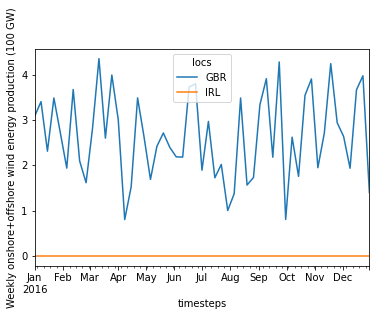

In [24]:
# Energy production, units = 100 GWh (summed over three hours)
energy_production = model.get_formatted_array("carrier_prod").to_series().dropna()
# Wind production
wind = (
    energy_production[energy_production.index.get_level_values("techs").str.find("wind") > -1]
    .sum(level=["locs", "timesteps"])
    .unstack("locs")
)
print(wind.head())
wind_7D_sum = wind.resample("7D").sum()
ax = wind_7D_sum.plot()
ax.set_ylabel("Weekly onshore+offshore wind energy production (100 GW)")